## tensorflow tutorials メモ

tensorflowが2.0になってチュートリアルも新しくなりました。勉強がてら、すべてのチュートリアルを自分の環境で行ってみたいと思います。コードはほぼチュートリアルのコピーです。その中で気づいた部分や、注意すべき部分がこの記事の付加価値です。

※実際に勉強するときは、コードをコピーするのではなく、理解しながら自分で入力することをお勧めします。

### tf tutorials 解説目次

1. KerasによるMLの基本
    1. [分類問題の初歩](/article/library/tf/tutorials/01/) : ([公式チュートリアル](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)) <= 現在のページ
    2. [TF Hubによるテキスト分類](/article/library/tf/tutorials/02/) : ([公式チュートリアル](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ja))
    3. [前処理されたテキストによるテキスト分類](/article/library/tf/tutorials/03/) : ([公式チュートリアル]())
    4. [回帰:燃費を予測する](/article/library/tf/tutorials/04/) : ([公式チュートリアル](https://www.tensorflow.org/tutorials/keras/regression?hl=ja))
    5. [オーバーフィットとアンダーフィット](/article/library/tf/tutorials/05/) : ([公式チュートリアル](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ja))
    6. [保存と読み込み](/article/library/tf/tutorials/06/) : ([公式チュートリアル](https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ja))
2. データの読み込みと前処理
    1. CSV
    2. NumPy
    3. pandas.DataFrame
    4. 画像
    5. テキスト
    6. Unicode
    7. TF.Text
    8. TFRecordとtf.Example
    9. tf.ioを使ったその他の形式
3. Estimator
4. Customization
5. Distributed training
6. images
    1. [Covolutional Neural Network]()
7. Text
    1. Word embeddings
    2. Text classification with an RNN
    3. Text generation with an RNN
    4. Neural machine translation with attention
    5. image captioning
    6. transfer model for languages understanding
8. Structured data
9. Generative

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/tf/tutorials/01/01_nb.ipynb)

### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt

from tensorflow import keras

print('tf version     : ', tf.__version__)
print('keras version  : ', keras.__version__)
print('numpy version  : ',np.__version__)
print('pandas version : ',pd.__version__)
print('matlib version : ',matplotlib.__version__)

tf version     :  2.1.0
keras version  :  2.2.4-tf
numpy version  :  1.16.2
pandas version :  1.0.3
matlib version :  3.0.3


## データの読み込み
訓練用のデータとテスト用のデータの読み込みです。

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print('train_images.shape : ', train_images.shape)
print('train_labels.shape : ', train_labels.shape)
print('test_images.shape  : ', test_images.shape)
print('test_labels.shape  : ', test_labels.shape)

train_images.shape :  (60000, 28, 28)
train_labels.shape :  (60000,)
test_images.shape  :  (10000, 28, 28)
test_labels.shape  :  (10000,)


In [6]:
train_images[0]
train_labels[0]

9

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

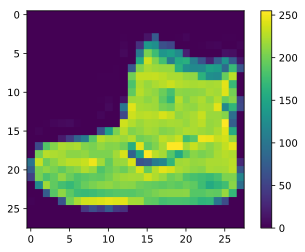

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

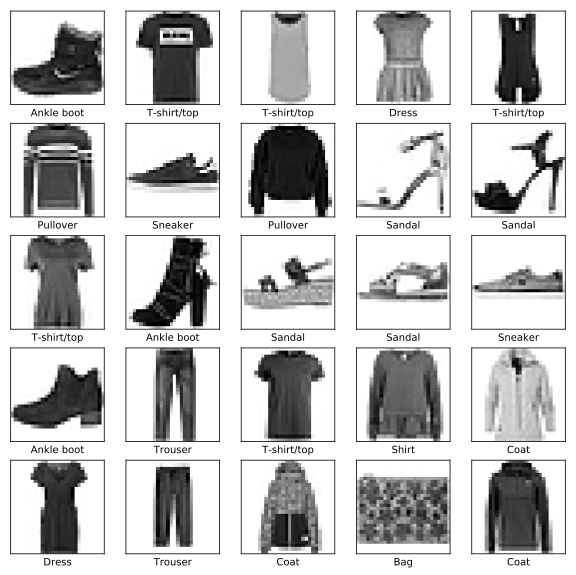

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築

### 層の設定

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### モデルのコンパイル

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4990 - accuracy: 0.8268
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3786 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3398 - accuracy: 0.8765
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3158 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2958 - accuracy: 0.8905


## 正解率の評価

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3456 - accuracy: 0.8766

Test accuracy: 0.8766


## 予測する

In [15]:
predictions = model.predict(test_images)
predictions[0]

array([5.8570577e-06, 6.3353154e-06, 1.7088925e-06, 8.8717564e-07,
       7.9191441e-06, 5.8428156e-03, 2.1456368e-05, 1.0776270e-01,
       1.1904114e-04, 8.8623130e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
      color = 'blue'
  else:
      color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

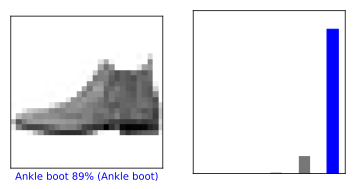

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

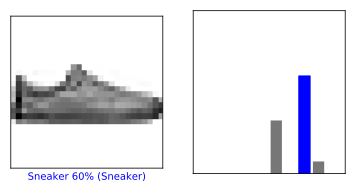

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

## 感想
tensorflow 2.0 形式になり、dry-by-runで実行できるようになったため、より直感的に利用できるという印象です。

## 参考資料
- [scikit-learn 公式ページ](https://scikit-learn.org/stable/datasets/index.html)
- いつも参考にしている[nkmkさん](https://note.nkmk.me/python-sklearn-datasets-load-fetch/)の記事です。